# Introduction to Neural Networks

## What is a neural network?
A neural network is a statistical learning model with the intention of modeling a brain's neuron for solving various data processing and non linear classification problems. These networks represent an interconnection of neurons that communicate with one another and can update each other through inputs and outputs.

## Where are neural networks best used?
Non-linear classification problems tend to work best with neural networks due to the weighted hidden nodes. 
Examples: image recognition, voice recognition, self driver cars, adaptive learning, etc.

## How does it work?
Neural networks have a 

This implementation will use a 3-layer neural network.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

### Generating Dataset
The make moons dataset is a random set of data where two circles are generated and about half of the data intersects with each other.

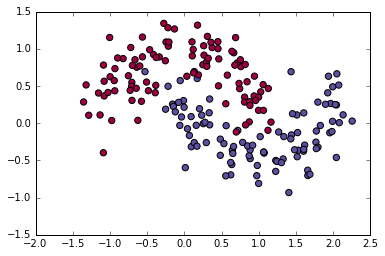

In [2]:
%matplotlib inline
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

### Purpose of the dataset
Think of these blue dots and healthy people and the red dots as unhealthy people. x and y axis are arbitrary medical measurements of health. The goal of this data set is to train a machine learning classifier that will predict whether the person is healty or not. Since the data intersects with each other, you can't use Logistical Regression to fit the data due to non-lineaer features. Non-linear features such as polynomials with SVMs would not work well either because you would have to worry about feature engineering.

http://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/

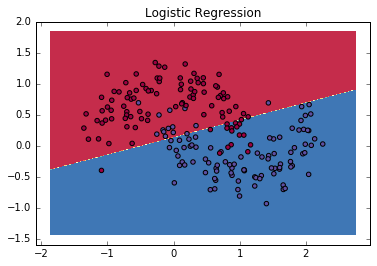

In [3]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

# Plot the decision boundary
def plot_decision_boundary(pred_func):

    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

plot_decision_boundary(lambda X: clf.predict(X))
plt.title("Logistic Regression")

### Logistic Regression
As you can you see, the decision boundary for defining patient types inaccurate.
http://stackoverflow.com/questions/34829807/understand-how-this-lambda-function-works

## Building a Neural Network

### Structure of the neural network
Lets build a 3 layer neural network. One input layer, one hidden layer, and one output layer. The number of nodes in the input layer is determined by the dimentionality of our data. Two input layers because two types of patients. The output layers is determined by the number of classes we have (patients). One output node predicting 0 or 1. Having two makes it easier to extend the network to more classes later on. class0(female) and class1(male).

### Choosing dimensionality 
Dimensionality is a term which means number of nodes in the hidden layer. The more nodes we put into the hidden layer, the more complex functions we will be able to fit. However, high dimensionality comes with a cost. First, more computation is required to make predictions and even worse, large number of parameters will result in more prone ot overfitting data.

### Picking an activation function for hidden layer
The purpose of an activation function is to transform the inputs of the layer into outputs. We need to choose a nonlinear activation function to fit the nonlinear hypotheses. Common activation functions: tanh, sigmoid, or ReLUs.

### Softmax
The activation function for the output layer will be the softmax. this is simply a way to convert raw scores to probabilities. Softmax can be throught of as a generalization to multiple classes.

## How the network makes predictions

### High level view
Two components that make a neural network the way is forward propagation and back propagation. Within these respective components, there are many sub topics within each.
Forward propagation: score function, activation function
Backpropagation: 

### Giving value to classes for predictions
Since the goal of the neural network is to give functionality for classifying distinct patients, we need a method of parameterizing our class values to scores. To do this, we will use a linear classifier function. A very simple one to implement is the linear mapping: 

$$ f(x_i, W, b) = x_iW + b $$

- W = weight
- x = input
- b = bias - this will set the node intentionally on or off. Also, this is the constant for 

### Forward Propagation
The purpose of forward propagation is to get the output and compare it with the real value to get error. The equation above this will be used in our forward propagation alongside with an activation function. If x is the 2-dimensional input to our network, then $ y(hat) $ is our prediction. y is the observed or real value. y - y(hat)

In [4]:
# def forward(inputs):
#     #assume inputs and weights are 1-D numpy arrays and bias is a number
#     cell_body_sum = np.sum(inputs * self.weights) + self.bias   # weight
#     firing_rate = 1.0 / (1.0 + math.exp(-cell_body_sum)         # sigmoid activation function
#     return firing_rate

### Forward and back propagation
To minimize error, you propagate backwards by finding the dervivative of the error with respect to each weight and then subtract this value from the weight value. The basic learning done in neural networks is training neurons when to get activated. Each neuron should activate for only a particular type of inputs and not all inputs. In other words, by propagating forward, you get to see how your neural network is behaving and find the error. After you find that your network has an error, you back propagate and use a form of gradient descent to update new values of weights. Then you will forward propagate to see how well those weights are performing and then backpropagate to update the weights. This will go on until a minima is reached for the error value.

### Math explaination of forward propagation
Each hidden layer in the neural network will receive a weight and an input. These weights will be calculated in the recipient hidden layer.

$ z_1 = xW_1 + b_1 $   <--- linear mapping for input 1 | $ W_1 \in \mathbb{R}^{2\times500} + b_1 \in \mathbb{R}^{500} $ |

$ a_1 = tanh(z_1) $    <--- activation function for input 1

$ z_2 = a_1W_2 + b_2 $ <--- linear mapping for input 2

$ a_2 = y(hat) = softmax(z_2) $ <--- activation function for input 2


z_i is the input of layer i and $ a_i $ is the output of layer i after applying the activation function. $ W_1, b_1, W_2, b_2 $ are parameters of our network, which we need to learn from our training data. You can think of them as matrices transforming data between layers of the network. Looking at the matrix multiplications above we can figure out the dimensionality of these matrices. If we use 500 nodes for our hidden layer then $ W_1 \in \mathbb{R}^{2\times500}, b_1 \in \mathbb{R}^{500}, W_2 \in \mathbb{R}^{500\times2}, b_2 \in \mathbb{R}^{2} $.

### Back propagation
Backpropagation is a two-fold cycle where the outputs of each predicted weight is compared and updated to the desired output weight using a loss function. Error values are propagated backwards until each neuron's associated error values represents its contribution to the original output.

### Math explaination of back propagation
We want to know how much change in each W affects the total errors $ \dfrac{\delta E_{total}}{\delta W} $. In other words, the partial derivative of $ E_{total} $ to W.

## Learning the Parameters
Learning the paramters for our network means finding parameters ($ W_1, b_1, W_2, b_2 $) that minize the error on our training data. How do we define the error? We call a function that measures our error, which is a loss function.  A common choice with the softmax output is the categorical cross entropy loss.


loss function = softmax + gradient descent
Purpose of loss function is to minimize the error in our training data. 

cross-entropy loss (negative log likelihood)



## Implementation of the neural network
### Build the Model
#### Initialize:
- input and output dimensionality
- learning rate for gradient descent
- regularization strength
- initial weights and bias

#### Loop:
Forward propagation -> back propagation -> add regularization -> gradient descent parameter update -> assign new parameters to the model -> (optional) calculate loss

In [5]:
num_examples = len(X) # training set size
nn_input_dim = 2      # input layer dimensionality
nn_output_dim = 2     # output layer dimensionality
 
# Gradient descent parameters (I picked these by hand)
epsilon = 0.01        # learning rate for gradient descent
reg_lambda = 0.01     # regularization strength

In [7]:
def forward(X):
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    yHat = sigmoid(z2)
    return yHat

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
def sigmoidPrime(x):
    return np.exp(-x) / (1 + np.exp(-x)) ** 2

In [10]:
def costFunctionPrime(X, y):
    print "partial derivative of cost func"

In [11]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
     
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # This is what we return at the end
    model = {}
     
    # Gradient descent. For each batch...
    for i in xrange(0, num_passes):
 
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
         
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
     
    return model

In [12]:
# Helper function to predict an output (0 or 1)
def predictSig(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    probs = sigmoidPrime(z2)
    return np.argmax(probs, axis=1)

In [13]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

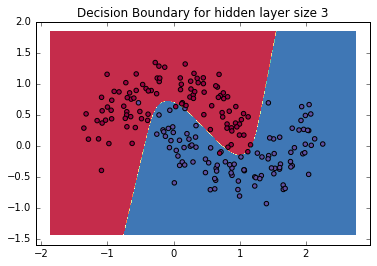

In [14]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

### Varying the hidden layers

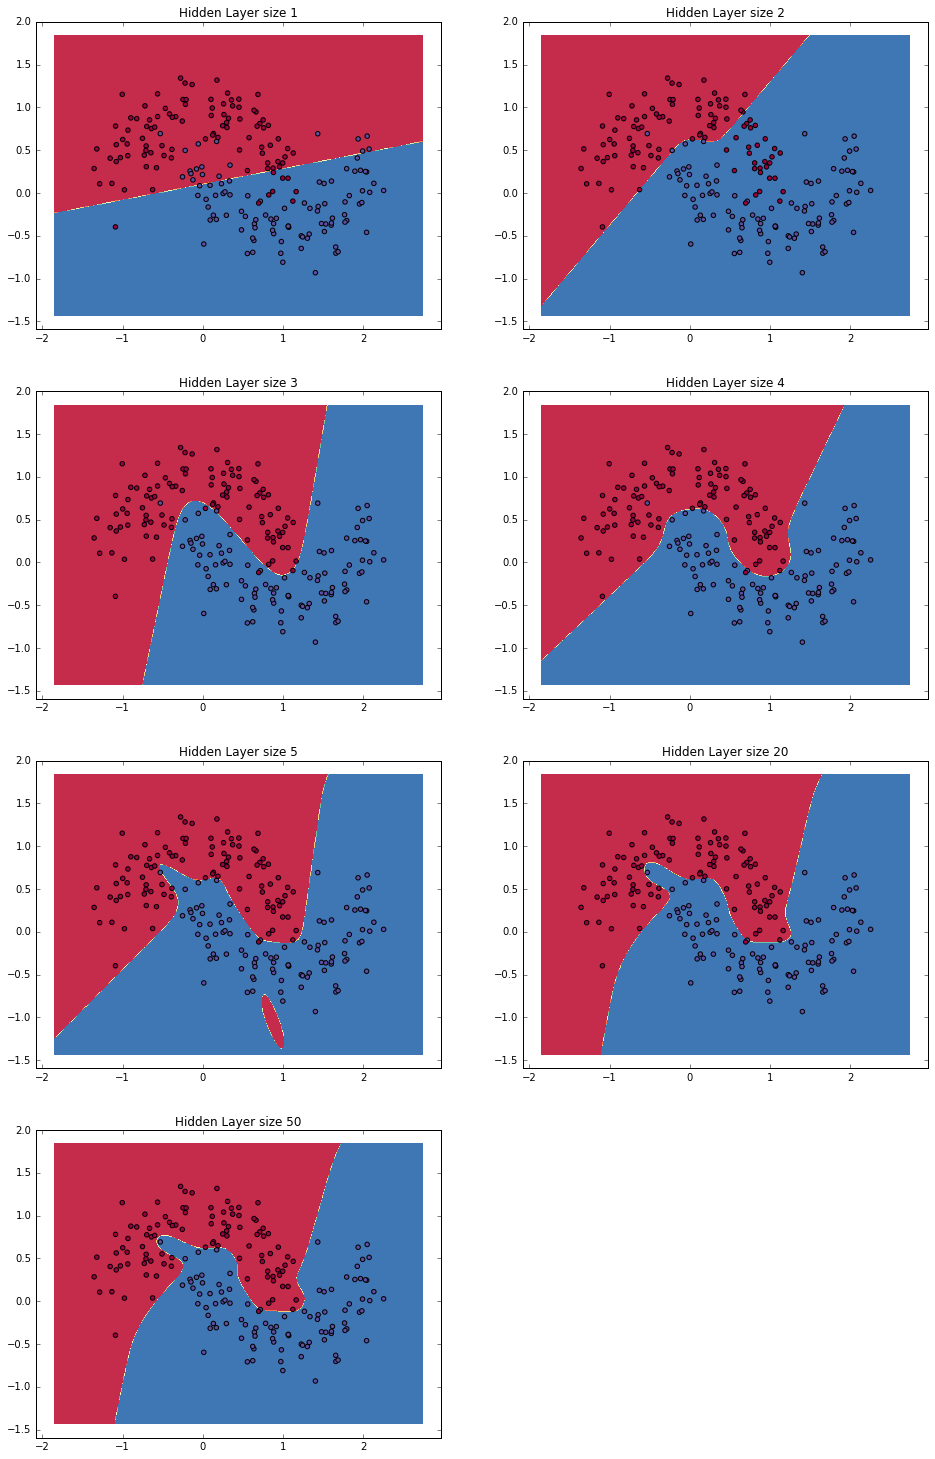

In [16]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

# Sources

Understanding a neural network:
- https://stevenmiller888.github.io/mind-how-to-build-a-neural-network/

Understanding forward propagation:
- http://cs231n.github.io/neural-networks-1

Purpose of bias:
- http://stats.stackexchange.com/questions/185911/why-are-bias-nodes-used-in-neural-networks
- https://www.quora.com/What-is-bias-in-artificial-neural-network

Understanding math to back propagation:
- http://neuralnetworksanddeeplearning.com/chap2.html

High level view of how forward and back propagation work:
- https://www.quora.com/What-is-the-difference-between-back-propagation-and-forward-propagation

Neural Network playground
- http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.32579&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false